# Exercise: Train and Run Your First Model

We've learned that models are computer code that processes information to make a prediction or a decision. Here, we train a model to guess a comfortable boot size for a dog, based on the size of the harness that fits them.

In the examples below, there's no need to edit any code. Try to read it, understand it, then press the run button to run it. As always with these notebooks, it's vitally important that these code blocks are run in the correct order, and nothing is missed.

## Preparing data

The first thing we do with a model is load data. We cover this in more detail in a later exercise. For now, we just write our data directly in our code. Review and run the following code to get started:


In [1]:
import pandas

# Make a dictionary of data for boot sizes
# and harness sizes in cm
data = {
    'boot_size' : [ 39, 38, 37, 39, 38, 35, 37, 36, 35, 40, 
                    40, 36, 38, 39, 42, 42, 36, 36, 35, 41, 
                    42, 38, 37, 35, 40, 36, 35, 39, 41, 37, 
                    35, 41, 39, 41, 42, 42, 36, 37, 37, 39,
                    42, 35, 36, 41, 41, 41, 39, 39, 35, 39
 ],
    'harness_size': [ 58, 58, 52, 58, 57, 52, 55, 53, 49, 54,
                59, 56, 53, 58, 57, 58, 56, 51, 50, 59,
                59, 59, 55, 50, 55, 52, 53, 54, 61, 56,
                55, 60, 57, 56, 61, 58, 53, 57, 57, 55,
                60, 51, 52, 56, 55, 57, 58, 57, 51, 59
                ]
}

# Convert it into a table using pandas
dataset = pandas.DataFrame(data)

# Print the data
dataset

,boot_size,harness_size
0,39,58
1,38,58
2,37,52
3,39,58
4,38,57
5,35,52
6,37,55
7,36,53
8,35,49
9,40,54


As you can see, we have the sizes of boots and harnesses for 50 avalanche dogs.

We want to use harness size to estimate boot size. This means `harness_size` is our _input_. We want a model that will process the input and make its own estimations of the boot size (output).  

## Select a model

The first thing we must do is select a model. We're just getting started, so let's start with a very simple model called _OLS_. This is just a straight line (sometimes called a trendline).

Let's use an existing library to create our model, but we won't train it yet.

In [3]:
from sklearn.linear_model import LinearRegression

# Create an OLS model object (not trained yet)
model = LinearRegression()


## Train our model

OLS models have two parameters (a slope and an offset), but these haven't been set in our model yet. We need to _train_ (_fit_) our model to find these values so that the model can reliably estimate dogs' boot size based on their harness size. 

The following code fits our model to data you've now seen:

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data: harness size (X) and boot size (y)
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)  # Harness sizes
y = np.array([15, 25, 35, 45, 55])  # Boot sizes
# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Retrieve the slope and offset (intercept) of the fitted model
slope = model.coef_[0]
offset = model.intercept_

print(f"Slope: {slope}")
print(f"Offset: {offset}")




Slope: 1.0
Offset: 5.0


Notice how training the model set its parameters. We could interpret these directly, but it's simpler to see it as a graph:


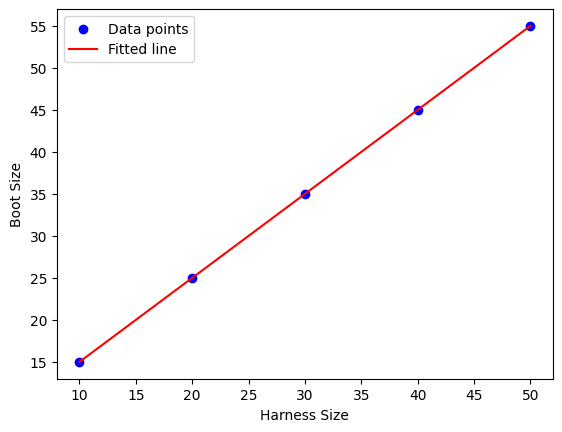

In [11]:
# Generate predictions using the model
y_pred = model.predict(X)

# Plot the data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot the regression line
plt.plot(X, y_pred, color='red', label='Fitted line')

plt.xlabel('Harness Size')
plt.ylabel('Boot Size')
plt.legend()
plt.show()



The graph above shows our original data as circles with a red line through it. The red line shows our _model_.

We can look at this line to understand our model. For example, we can see that as harness size increases, so will the estimated boot size. 

## Use the model

Now that we've finished training, we can use our model to predict a dog's boot size from their harness size. 

For example, by looking at the red line, we can see that that a harness size of `52.5` (x axis) corresponds to a boot size of about `36.5` (y axis).

We don't have to do this by eye though. We can use the model in our program to predict any boot size we like. Run the following code to see how we can use our model now that it's trained:

In [13]:
# Example harness size for prediction
new_harness_size = np.array([[52.5]])

# Predict the boot size using the trained model
predicted_boot_size = model.predict(new_harness_size)

print(f"Predicted boot size for harness size {new_harness_size[0][0]}: {predicted_boot_size[0]}")


Predicted boot size for harness size 52.5: 57.5


If you'd like, change the value of `52.5` in `harness_size` to a new value and run the block above to see the model in action.


## Save and load a model

Our model is ready to use, but we don't need it yet. Let's save it to disk.

In [15]:
import joblib

# Save the trained model to a file
filename = 'trained_model.joblib'
joblib.dump(model, filename)

print(f"Model saved to {filename}")


Model saved to trained_model.joblib


Loading our model is just as easy:

In [17]:
import joblib

# Load the model from the file
filename = 'trained_model.joblib'
loaded_model = joblib.load(filename)

print("Model loaded successfully")


Model loaded successfully


## Put it together

On our website, we want to take the harness of our customer's dog, then calculate their dog's boot size using the model that we've already trained.

Let's put everything here together to make a function that loads the model from disk, then uses it to predict our customer's dog's boot size.

In [20]:
import numpy as np
import joblib

def predict_boot_size(harness_size):
    """
    Load the trained model from disk and predict the boot size for a given harness size.

    Parameters:
    harness_size (float): The size of the harness.

    Returns:
    float: The predicted boot size.
    """
    # Load the model from the file
    filename = 'trained_model.joblib'
    loaded_model = joblib.load(filename)

    # Ensure the harness size is in the correct shape for prediction
    harness_size_array = np.array([[harness_size]])

    # Predict the boot size using the loaded model
    predicted_boot_size = loaded_model.predict(harness_size_array)

    return predicted_boot_size[0]





## Real world use 

We've done it; we can predict an avalanche dog's boot size based on the size of their harness. Our last step is to use this to warn people if they might be buying the wrong sized doggy boots. 

As an example, we make a function that accepts the harness size, the size of the boots selected, and returns a message for the customer. We would integrate this function into our online store.

In [22]:
import numpy as np
import joblib

def check_boot_size(harness_size, selected_boot_size):
    """
    Check if the selected boot size is appropriate for the given harness size.

    Parameters:
    harness_size (float): The size of the harness.
    selected_boot_size (float): The size of the boots selected by the customer.

    Returns:
    str: A message indicating whether the selected boot size is appropriate.
    """
    # Load the model from the file
    filename = 'trained_model.joblib'
    loaded_model = joblib.load(filename)

    # Ensure the harness size is in the correct shape for prediction
    harness_size_array = np.array([[harness_size]])

    # Predict the boot size using the loaded model
    predicted_boot_size = loaded_model.predict(harness_size_array)[0]

    # Define an acceptable range around the predicted boot size
    acceptable_range = 1.5  # Example range: +/- 1.5 units

    # Check if the selected boot size is within the acceptable range
    if abs(predicted_boot_size - selected_boot_size) <= acceptable_range:
        return f"Selected boot size {selected_boot_size} is appropriate for harness size {harness_size}."
    else:
        return (f"Selected boot size {selected_boot_size} may not be appropriate for harness size {harness_size}. "
                f"Consider a boot size closer to {predicted_boot_size:.2f}.")

# Example usage:
harness_size = 52.5
selected_boot_size = 36.0
message = check_boot_size(harness_size, selected_boot_size)
print(message)


Selected boot size 36.0 may not be appropriate for harness size 52.5. Consider a boot size closer to 57.50.


Change `selected_harness_size` and `selected_boot_size` in the preceding example and re-run the cell to see this in action.

## Summary

Well done! We've put together a system that can predict if customers are buying doggy boots that may not fit their avalanche dog, based solely on the size of harness they're purchasing. 

In this exercise, we practiced:

1. Creating basic models
2. Training, then saving them to disk
3. Loading them from disk
4. Making predictions with them using new data sets